![example image](./000000269314.jpg)

Countless hours of footage have been filmed by hidden cameras for a wildlife documentary. The footage needs to be examined to find out when animals have been captured in the footage. Classifying all captured images based on whether the feature animals could save weeks of work. 

You are part of a data science team involved in making this documentary, and your task is to prepare an image processing pipeline. The pipeline will augment existing datasets of images featuring animals so that an object-detection model can be trained and used on the footage.

Data augmentation involves creating variations of the original images through transformations like rotation, scaling, and equalizing to increase the training dataset's diversity and models' robustness. This technique enriches the dataset without collecting more data, helping models generalize better to new, unseen images.

In this project, you will perform image processing operations on five images featuring animals. The output of this project will be a pipeline transforming images to produce augmented datasets.

## Data

The `COCO` (Common Objects in Context) dataset is a dataset designed for training and evaluating computer vision models on a variety of tasks, including object detection. Five images featuring animals have been downloaded from this dataset. 

The list `file_names` is already available and contains the names of the image files available in the current directory.

In [3]:
# Import Matplotlib to read and display images 
import matplotlib.pyplot as plt
# Import the necessary modules from scikit-image for image transformation, and exposure adjustment
from skimage.transform import resize, rotate 
from skimage.exposure import equalize_adapthist

# List of filenames for the images to be processed
file_names = ["000000546829.jpg","000000012062.jpg","000000417085.jpg","000000269314.jpg","000000575357.jpg"]

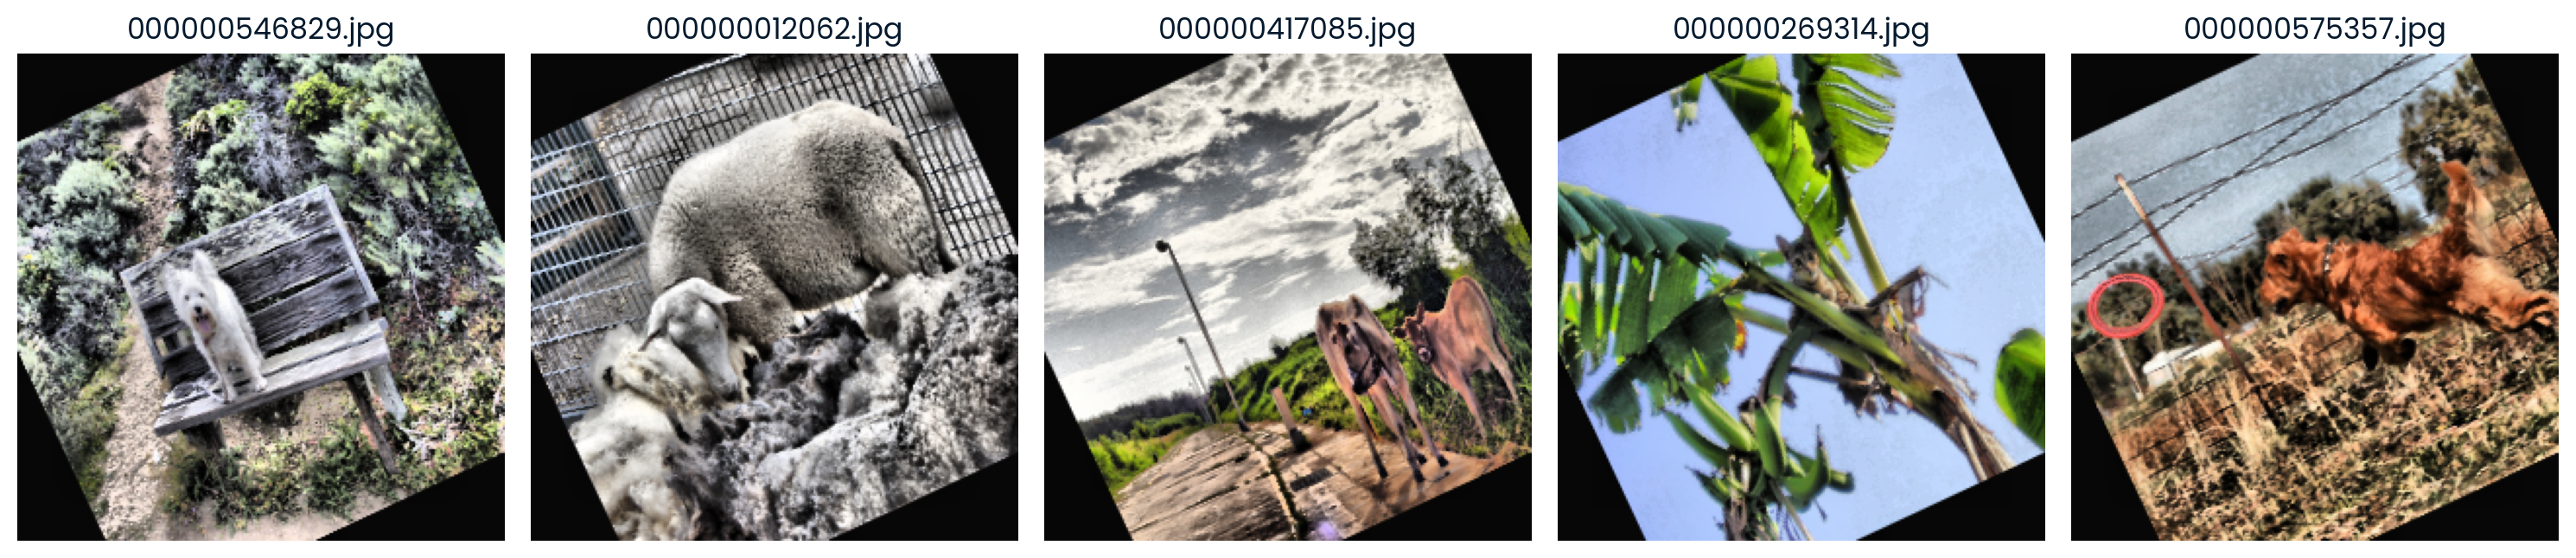

In [4]:
# Import Matplotlib to read and display images 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize, rotate 
from skimage.exposure import equalize_adapthist

# =========================================
# Define the image processing function
# =========================================
def image_processing(file_names, size=(250, 250), rotation_angle=0, equalization_clip_limit=None):
    """
    Imports and transforms multiple images (resize, rotate, equalize) and returns them as a list.
    
    Parameters:
        file_names (list): List of image file paths.
        size (tuple): Target resize dimensions (height, width). Default (250, 250).
        rotation_angle (float): Angle in degrees for rotation. Default 0.
        equalization_clip_limit (float or None): CLAHE clip limit (0–1). If None, skip equalization.
        
    Returns:
        list: Transformed images.
    """
    transformed_images = []
    
    for file in file_names:
        # 1️⃣ Import image
        img = imread(file)
        
        # 2️⃣ Resize image
        img_resized = resize(img, size)
        
        # 3️⃣ Rotate image
        img_rotated = rotate(img_resized, angle=rotation_angle)
        
        # 4️⃣ Equalize (if clip limit provided)
        if equalization_clip_limit is not None:
            img_equalized = equalize_adapthist(img_rotated, clip_limit=equalization_clip_limit)
        else:
            img_equalized = img_rotated
        
        transformed_images.append(img_equalized)
    
    return transformed_images


# =========================================
# Apply the transformation function
# =========================================
file_names = ["000000546829.jpg", "000000012062.jpg", "000000417085.jpg", "000000269314.jpg", "000000575357.jpg"]

# Example: resize to (250,250), rotate by 25°, and apply equalization
transformed_images = image_processing(file_names, size=(250, 250), rotation_angle=25, equalization_clip_limit=0.03)


# =========================================
# Visualize results
# =========================================
fig, axes = plt.subplots(1, len(transformed_images), figsize=(15, 5))
for ax, img, name in zip(axes, transformed_images, file_names):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(name)
plt.tight_layout()
plt.show()
